In [1]:
import pyLDAvis
print(pyLDAvis.__version__)

3.4.0


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import spacy

In [3]:
import json

## Part 1 - Topic Modeling ##

### Task 1: Data preprocessing ###

In [4]:
with open('reuters21578.json', 'r') as file:
    data = json.load(file)

In [60]:
data

[{'topics': ['cocoa'],
  'text': 'Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There are doubts as

In [6]:
filtered_data = [sample for sample in data if sample["topics"] and sample["text"].strip()]

print(f"Number of samples after filtering: {len(filtered_data)}")


Number of samples after filtering: 9866


In [7]:
filtered_data

[{'topics': ['cocoa'],
  'text': 'Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There are doubts as

In [8]:
from collections import Counter

topic_counter = Counter()
for sample in filtered_data:
    topic_counter.update(sample["topics"])

In [9]:
topic_counter

Counter({'earn': 3776,
         'acq': 2134,
         'money-fx': 605,
         'grain': 534,
         'crude': 517,
         'trade': 453,
         'interest': 391,
         'ship': 284,
         'wheat': 265,
         'corn': 209,
         'oilseed': 161,
         'sugar': 154,
         'coffee': 137,
         'dlr': 127,
         'gnp': 126,
         'veg-oil': 123,
         'gold': 122,
         'money-supply': 118,
         'soybean': 102,
         'nat-gas': 101,
         'livestock': 97,
         'bop': 90,
         'cpi': 86,
         'carcass': 68,
         'cocoa': 65,
         'copper': 64,
         'reserves': 63,
         'jobs': 61,
         'rice': 59,
         'cotton': 58,
         'alum': 54,
         'iron-steel': 52,
         'meal-feed': 48,
         'yen': 48,
         'rubber': 47,
         'ipi': 46,
         'barley': 45,
         'gas': 44,
         'palm-oil': 39,
         'sorghum': 33,
         'zinc': 33,
         'pet-chem': 32,
         'tin': 30,
      

In [10]:
top_10_topics = [topic for topic, _ in topic_counter.most_common(10)]
print(f"Top 10 topics: {top_10_topics}")

Top 10 topics: ['earn', 'acq', 'money-fx', 'grain', 'crude', 'trade', 'interest', 'ship', 'wheat', 'corn']


In [11]:
final_data = [sample for sample in filtered_data if any(topic in top_10_topics for topic in sample["topics"])]

print(f"Number of samples after retaining top 10 topics: {len(final_data)}")

topic_distribution = Counter()
for sample in final_data:
    topic_distribution.update(sample["topics"])
print("Sample distribution across top 10 topics:")
for topic, count in topic_distribution.most_common(10):
    print(f"{topic}: {count}")

Number of samples after retaining top 10 topics: 8284
Sample distribution across top 10 topics:
earn: 3776
acq: 2134
money-fx: 605
grain: 534
crude: 517
trade: 453
interest: 391
ship: 284
wheat: 265
corn: 209


In [12]:
final_data

[{'topics': ['grain', 'wheat', 'corn', 'barley', 'oat', 'sorghum'],
  'text': 'The U.S. Agriculture Department\nreported the farmer-owned reserve national five-day average\nprice through February 25 as follows (Dlrs/Bu-Sorghum Cwt) -\n         Natl   Loan           Release   Call\n         Avge   Rate-X  Level    Price  Price\n Wheat   2.55   2.40       IV     4.65     --\n                            V     4.65     --\n                           VI     4.45     --\n Corn    1.35   1.92       IV     3.15   3.15\n                            V     3.25     --\n X - 1986 Rates.\n\n          Natl   Loan          Release   Call\n          Avge   Rate-X  Level   Price  Price\n Oats     1.24   0.99        V    1.65    -- \n Barley   n.a.   1.56       IV    2.55   2.55\n                             V    2.65    -- \n Sorghum  2.34   3.25-Y     IV    5.36   5.36\n                             V    5.54    -- \n    Reserves I, II and III have matured. Level IV reflects\ngrain entered after Oct 6, 

### Task 2: Topic modeling ###

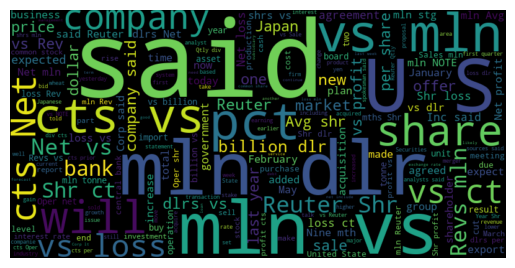

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(sample["text"] for sample in final_data)
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
# Convert stopwords to a set for fast lookup
stop_words = set(stopwords.words('english'))
# Prepare data for LDA analysis.
# ○ Transform the textual data from “text” field for each sample into a format that will
# ○ Print one sample before and after preprocessing.
# Change json to dataframe with 2 columns
reuters_df = pd.DataFrame(final_data, columns=['topics', 'text'])
# serve as an input for training a LDA model. You need to tokenize the text and
# remove the stopwords using NLTK.
def lda_preprocessing(text):
    tokens = word_tokenize(text.lower())
    cleaned_text = [word for word in tokens if word not in stop_words]
    return [cleaned_text]

reuters_df[['cleaned_text']] = reuters_df['text'].apply( lambda x: pd.Series(lda_preprocessing(x)))
    
# Example before/after
print("Before:", reuters_df['text'][0])
print("After:", reuters_df['cleaned_text'][0])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivamsinghrawat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Before: The U.S. Agriculture Department
reported the farmer-owned reserve national five-day average
price through February 25 as follows (Dlrs/Bu-Sorghum Cwt) -
         Natl   Loan           Release   Call
         Avge   Rate-X  Level    Price  Price
 Wheat   2.55   2.40       IV     4.65     --
                            V     4.65     --
                           VI     4.45     --
 Corn    1.35   1.92       IV     3.15   3.15
                            V     3.25     --
 X - 1986 Rates.

          Natl   Loan          Release   Call
          Avge   Rate-X  Level   Price  Price
 Oats     1.24   0.99        V    1.65    -- 
 Barley   n.a.   1.56       IV    2.55   2.55
                             V    2.65    -- 
 Sorghum  2.34   3.25-Y     IV    5.36   5.36
                             V    5.54    -- 
    Reserves I, II and III have matured. Level IV reflects
grain entered after Oct 6, 1981 for feedgrain and after July
23, 1981 for wheat. Level V wheat/barley after 5/14/82,
c

In [15]:
# Convert the value of “text” for each sample into a bag-of-words
# representation using gensim's corpora.dictionary methods.
# A Corpus in gensim is a collection of documents (news stories in our
# case). A Dictionary encapsulates the mapping between normalized
# words and their integer ids.
# ○ Restrict vocabulary to only the top 10K terms that show up in at least 5 documents
# and no more than 20% of all documents.

from gensim.corpora import Dictionary
import gensim
# Create dictionary and filter extremes
dictionary = Dictionary(reuters_df['cleaned_text'])
dictionary.filter_extremes(no_below=5, no_above=0.2, keep_n=10000)

# Bag-of-words corpus
corpus = [dictionary.doc2bow(sample) for sample in reuters_df["cleaned_text"]]

In [16]:
num_topics=10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           passes=10,
                                           alpha='auto')

In [17]:
for i in range(num_topics):
    print("topic %s:\t%s" % (i, ' '.join([term for term, freq in lda_model.show_topic(i, topn=10)])))

topic 0:	bank dollar rates market rate u.s. interest west '' ``
topic 1:	'' `` trade u.s. government states united told foreign also
topic 2:	& lt > corp co ltd sale group new unit
topic 3:	april record dividend may march pay div prior qtly bank
topic 4:	billion tonnes 1986 last wheat quarter grain 1987 ) (
topic 5:	shares stock common offer share group outstanding corp board tender
topic 6:	oil u.s. iran gulf iranian crude attack bpd opec platform
topic 7:	japan japanese u.s. trade ec ministry officials european official taiwan
topic 8:	loss profit revs nine billion mths note : avg shrs
topic 9:	'' `` analysts could offer market also analyst last u.s.


In [18]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.__version__



'3.4.0'

In [19]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.1

In [61]:
lda_model_5 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

In [62]:
for i in range(5):
    print("topic %s:\t%s" % (i, ' '.join([term for term, freq in lda_model.show_topic(i, topn=10)])))

topic 0:	bank dollar rates market rate u.s. interest west '' ``
topic 1:	'' `` trade u.s. government states united told foreign also
topic 2:	& lt > corp co ltd sale group new unit
topic 3:	april record dividend may march pay div prior qtly bank
topic 4:	billion tonnes 1986 last wheat quarter grain 1987 ) (


In [63]:
vis = gensimvis.prepare(lda_model_5, corpus, dictionary)
pyLDAvis.display(vis)

/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=46537) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/textmining/lib/python3.1

In [102]:
from gensim.models import CoherenceModel
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

num_topics_range = range(2, 11) 
coherence_scores = []

for num in num_topics_range:
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num)
    
    coherence_model = CoherenceModel(model=lda_model, texts=reuters_df['cleaned_text'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    coherence_scores.append((num, coherence_score))
    print(f"Num Topics: {num}, Coherence Score: {coherence_score}")

best_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
print(f"\nBest number of topics: {best_num_topics}")


Num Topics: 2, Coherence Score: 0.418945659981411
Num Topics: 3, Coherence Score: 0.4472296435282117
Num Topics: 4, Coherence Score: 0.413957618486714
Num Topics: 5, Coherence Score: 0.4475847275055832
Num Topics: 6, Coherence Score: 0.46709942783958275
Num Topics: 7, Coherence Score: 0.5192699232298065
Num Topics: 8, Coherence Score: 0.497068536053739
Num Topics: 9, Coherence Score: 0.46342465569469915
Num Topics: 10, Coherence Score: 0.45858620692958796

Best number of topics: 7


In [93]:
import numpy as np
from scipy.spatial.distance import jensenshannon

num_topics_range = range(2, 11)
jsd_scores = []

for num in num_topics_range:
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num, random_state=42)
    
    topic_word_dist = np.array([lda_model.get_topic_terms(topicid, topn=len(dictionary)) for topicid in range(num)])
    
    distances = []
    for i in range(num):
        for j in range(i+1, num):
            jsd = jensenshannon(topic_word_dist[i][:, 1], topic_word_dist[j][:, 1])  # JSD between topics
            distances.append(jsd)
    
    avg_jsd = np.mean(distances) 
    jsd_scores.append((num, avg_jsd))
    print(f"Num Topics: {num}, Avg JSD Score: {avg_jsd}")

best_num_topics_jsd = max(jsd_scores, key=lambda x: x[1])[0]
print(f"\nBest number of topics based on JSD: {best_num_topics_jsd}")


Num Topics: 2, Avg JSD Score: 0.079179558244582
Num Topics: 3, Avg JSD Score: 0.07234417263563742
Num Topics: 4, Avg JSD Score: 0.07559421442340651
Num Topics: 5, Avg JSD Score: 0.08200052453476792
Num Topics: 6, Avg JSD Score: 0.10835359186857968
Num Topics: 7, Avg JSD Score: 0.11066026773436077
Num Topics: 8, Avg JSD Score: 0.10524018162219094
Num Topics: 9, Avg JSD Score: 0.10780470617256122
Num Topics: 10, Avg JSD Score: 0.10906753711008087

Best number of topics based on JSD: 7


In [100]:
num = 7
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num)
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [101]:
num = 6
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num)
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

## Task 3 ##

In [27]:
import pandas as pd

def get_dominant_topic(lda_model, bow):
    topic_probs = lda_model[bow]
    return sorted(topic_probs, key=lambda x: x[1], reverse=True)[0]

reuters_df["Dominant_Topic"] = reuters_df["cleaned_text"].apply(
    lambda x: get_dominant_topic(lda_model,dictionary.doc2bow(x) )[0]
)
reuters_df["Topic_Perc_Contrib"] = reuters_df["cleaned_text"].apply(
    lambda x: get_dominant_topic(lda_model, dictionary.doc2bow(x))[1]
)

In [28]:
reuters_df.head(10)

,topics,text,cleaned_text,Dominant_Topic,Topic_Perc_Contrib
0,"[grain, wheat, corn, barley, oat, sorghum]",The U.S. Agriculture Department\nreported the ...,"[u.s., agriculture, department, reported, farm...",4,0.445168
1,"[veg-oil, linseed, lin-oil, soy-oil, sun-oil, ...",Argentine grain board figures show\ncrop regis...,"[argentine, grain, board, figures, show, crop,...",4,0.812616
2,[earn],Champion Products Inc said its\nboard of direc...,"[champion, products, inc, said, board, directo...",3,0.567207
3,[acq],Computer Terminal Systems Inc said\nit has com...,"[computer, terminal, systems, inc, said, compl...",2,0.463115
4,[earn],"Shr 34 cts vs 1.19 dlrs\n Net 807,000 vs 2,...","[shr, 34, cts, vs, 1.19, dlrs, net, 807,000, v...",8,0.805870
5,"[earn, acq]","Ohio Mattress Co said its first\nquarter, endi...","[ohio, mattress, co, said, first, quarter, ,, ...",4,0.491586
6,[earn],Oper shr loss two cts vs profit seven cts\n ...,"[oper, shr, loss, two, cts, vs, profit, seven,...",8,0.985759
7,[earn],Shr one dlr vs 73 cts\n Net 12.6 mln vs 15....,"[shr, one, dlr, vs, 73, cts, net, 12.6, mln, v...",8,0.953538
8,[earn],Dean Foods Co expects earnings for the\nfourth...,"[dean, foods, co, expects, earnings, fourth, q...",4,0.306584
9,"[wheat, grain]","The Commodity Credit Corporation, CCC,\nhas ac...","[commodity, credit, corporation, ,, ccc, ,, ac...",4,0.647687


In [29]:
for topic_num in range(10):
    top_doc = reuters_df.loc[reuters_df["Dominant_Topic"] == topic_num].nlargest(1, "Topic_Perc_Contrib")
    print(f"\nTopic {topic_num} (Pre-assigned: {top_doc['topics'].values[0]})")
    print("Text:", top_doc["text"].values[0][:800])


Topic 0 (Pre-assigned: ['money-fx', 'interest'])
Text: A half point cut in base lending rates
was announced by the big four clearing banks today after the
Bank of England finally endorsed such a move following weeks of
downward pressure, dealers said.
    During its routine intervention in the market, the bank
trimmed the rates at which it deals with the discount houses by
half a point and National Westminster led the other clearing
banks in reducing its base rate to 10-1/2 pct from 11 pct.
    The timing of the Bank of England move took operators by
surprise after its recent action seemingly designed to dampen
hopes of a base rate cut ahead of the U.K. Budget on March 17.
       For some time, fundamentals have
led the market to push for a one point cut in base lending
rates to 10 pct but the central bank has declined to follow
wholesale mone

Topic 1 (Pre-assigned: ['trade'])
Text: House Ways and Means Committee
Chairman Dan Rostenkowski said Congress must avoid a temptation
to pass

In [104]:
for topic_num in range(10):
    top_doc = reuters_df.loc[reuters_df["Dominant_Topic"] == topic_num].nlargest(1, "Topic_Perc_Contrib")
    print(f"\nTopic {topic_num} (Pre-assigned: {top_doc['topics'].values[0]})")


Topic 0 (Pre-assigned: ['money-fx', 'interest'])

Topic 1 (Pre-assigned: ['trade'])

Topic 2 (Pre-assigned: ['acq'])

Topic 3 (Pre-assigned: ['earn'])

Topic 4 (Pre-assigned: ['grain', 'wheat', 'corn'])

Topic 5 (Pre-assigned: ['acq'])

Topic 6 (Pre-assigned: ['crude'])

Topic 7 (Pre-assigned: ['trade'])

Topic 8 (Pre-assigned: ['earn'])

Topic 9 (Pre-assigned: ['acq'])


## Part 2 ##

### Task 1 ###

In [30]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('GMB_train.csv')
test_df = pd.read_csv('GMB_test.csv')

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nColumns:", train_df.columns.tolist())

Training set shape: (17806, 5)
Test set shape: (4271, 5)

Columns: ['Unnamed: 0', 'Sentence #', 'Word', 'POS', 'Tag']


In [35]:
train_df.head(40)

,Unnamed: 0,Sentence #,Word,POS,Tag
0,0,1.0,Thousands,NNS,O
1,1,1.0,of,IN,O
2,2,1.0,demonstrators,NNS,O
3,3,1.0,have,VBP,O
4,4,1.0,marched,VBN,O
5,5,1.0,through,IN,O
6,6,1.0,London,NNP,B-geo
7,7,1.0,to,TO,O
8,8,1.0,protest,VB,O
9,9,1.0,the,DT,O



Training set - Max length: 62 , Min length: 4 , No. of training sentences: 800
Test set - Max length: 42 , Min length: 4 , No. of testing sentences: 200


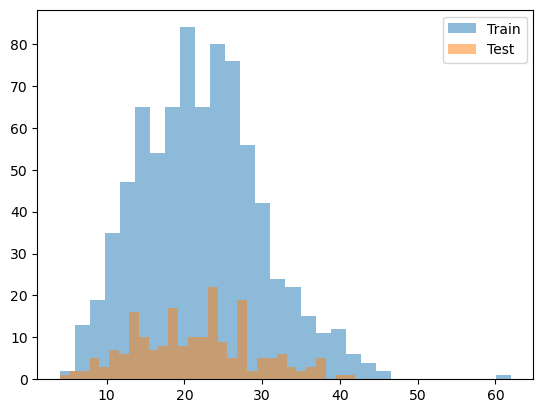

In [41]:
train_sentences = train_df.groupby('Sentence #').size()
test_sentences = test_df.groupby('Sentence #').size()

print("\nTraining set - Max length:", train_sentences.max(), 
      ", Min length:", train_sentences.min(), ", No. of training sentences:", len(train_sentences))
print("Test set - Max length:", test_sentences.max(), 
      ", Min length:", test_sentences.min(), ", No. of testing sentences:", len(test_sentences))

# Plot length distribution
import matplotlib.pyplot as plt
plt.hist(train_sentences, bins=30, alpha=0.5, label='Train')
plt.hist(test_sentences, bins=30, alpha=0.5, label='Test')
plt.legend()
plt.show()

In [42]:
# Top 5 entities in train/test
train_tags = train_df['Tag'].value_counts().head(5)
test_tags = test_df['Tag'].value_counts().head(5)
print("\nTop 5 Train Tags:\n", train_tags)
print("\nTop 5 Test Tags:\n", test_tags)


Top 5 Train Tags:
 Tag
O        15246
B-gpe      472
B-geo      453
B-org      319
I-per      314
Name: count, dtype: int64

Top 5 Test Tags:
 Tag
O        3598
B-geo     130
B-org      94
I-per      86
B-tim      85
Name: count, dtype: int64


### Task 2 ###

In [46]:
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_classification_report

def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'word': word,
        'word.lower()': word.lower(),
        'postag': postag,
        'isupper()': word.isupper(),
        'isdigit()': word.isdigit(),
        'istitle()': word.istitle(),
    }
    # Add context (previous/next word)
    if i > 0:
        features.update({
            'prev_word': sent[i-1][0],
            'prev_postag': sent[i-1][1],
        })
    if i < len(sent)-1:
        features.update({
            'next_word': sent[i+1][0],
            'next_postag': sent[i+1][1],
        })
    return features

# Prepare sequences
train_sent = train_df.groupby('Sentence #').apply(
    lambda x: list(zip(x['Word'], x['POS'], x['Tag'])))

/var/folders/74/p4x7mshd2tv1cdnjkzbgc_z40000gn/T/ipykernel_46537/1545834631.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_sent = train_df.groupby('Sentence #').apply(


In [47]:
train_sent

Sentence #
1.0      [(Thousands, NNS, O), (of, IN, O), (demonstrat...
2.0      [(Families, NNS, O), (of, IN, O), (soldiers, N...
3.0      [(They, PRP, O), (marched, VBD, O), (from, IN,...
4.0      [(Police, NNS, O), (put, VBD, O), (the, DT, O)...
5.0      [(The, DT, O), (protest, NN, O), (comes, VBZ, ...
                               ...                        
796.0    [(Presidents, NNS, O), (of, IN, O), (member, N...
797.0    [(With, IN, O), (the, DT, O), (new, JJ, O), (m...
798.0    [(Bolivian, JJ, B-gpe), (President, NNP, B-per...
799.0    [(Bolivia, NNP, B-geo), (is, VBZ, O), (an, DT,...
800.0    [(Meanwhile, RB, O), (,, ,, O), (Paraguay, NNP...
Length: 800, dtype: object

In [53]:
X_train = [[word2features(s, i) for i in range(len(s))] for s in train_sent]

y_train = [[tag for (word, pos, tag) in sentence] for sentence in train_sent]

In [54]:
crf = CRF(algorithm='lbfgs', c1=0.1, c2=0.1, max_iterations=100)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', c1=0.1, c2=0.1, max_iterations=100)

## Task 3 - Token-Level Metrics ##

In [57]:
test_sent = test_df.groupby('Sentence #').apply(
    lambda x: list(zip(x['Word'], x['POS'], x['Tag'])))
X_test = [[word2features(s, i) for i in range(len(s))] for s in test_sent]

y_test = [[tag for (word, pos, tag) in sentence] for sentence in test_sent]

y_pred = crf.predict(X_test)
print(flat_classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       B-art       1.00      0.20      0.33         5
       B-eve       0.00      0.00      0.00         7
       B-geo       0.73      0.77      0.75       130
       B-gpe       0.51      0.80      0.62        71
       B-org       0.67      0.45      0.54        94
       B-per       0.80      0.75      0.78        76
       B-tim       0.95      0.66      0.78        85
       I-art       0.00      0.00      0.00         2
       I-eve       0.00      0.00      0.00         4
       I-geo       0.74      0.52      0.61        33
       I-gpe       0.00      0.00      0.00         0
       I-org       0.52      0.69      0.59        45
       I-per       0.78      0.90      0.83        86
       I-tim       1.00      0.23      0.37        35
           O       0.98      0.99      0.99      3598

    accuracy                           0.94      4271
   macro avg       0.58      0.46      0.48      4271
weighted avg       0.94   

/var/folders/74/p4x7mshd2tv1cdnjkzbgc_z40000gn/T/ipykernel_46537/3265229277.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_sent = test_df.groupby('Sentence #').apply(
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/textmining/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true 

## Task 3 - Sentence-level Matrics ##

In [111]:
# 2. Span-Level Evaluation
def get_spans(tags):
    """Convert BIO tags to spans [(label, start, end), ...]"""
    spans = []
    current_entity = None
    for i, tag in enumerate(tags):
        if tag.startswith('B-'):
            if current_entity:
                spans.append(tuple(current_entity))
            current_entity = [tag[2:], i, i]
        elif tag.startswith('I-'):
            if current_entity and current_entity[0] == tag[2:]:
                current_entity[2] = i
        else:
            if current_entity:
                spans.append(tuple(current_entity))
            current_entity = None
    if current_entity:
        spans.append(tuple(current_entity))
    return spans

def span_level_evaluation(true_sequences, pred_sequences, exact=True):
    """Evaluate spans with exact or approximate matching"""
    tp = fp = fn = 0
    
    for true_tags, pred_tags in zip(true_sequences, pred_sequences):
        true_spans = get_spans(true_tags)
        pred_spans = get_spans(pred_tags)
        
        if exact:

            true_set = set(true_spans)
            pred_set = set(pred_spans)
            tp += len(true_set & pred_set)
            fp += len(pred_set - true_set)
            fn += len(true_set - pred_set)
        else:

            matched_true = set()
            matched_pred = set()
            
            for t_span in true_spans:
                for p_span in pred_spans:
                    if (t_span[0] == p_span[0] and  # Label match
                        max(t_span[1], p_span[1]) <= min(t_span[2], p_span[2])):  # Overlap
                        matched_true.add(t_span)
                        matched_pred.add(p_span)
                        break
            
            tp += len(matched_true)
            fn += len(true_spans) - len(matched_true)
            fp += len(pred_spans) - len(matched_pred)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1


In [113]:
# Exact match evaluation
exact_precision, exact_recall, exact_f1 = span_level_evaluation(y_test, y_pred, exact=True)
print("\nSpan-Level Exact Match Evaluation:")
print(f"Precision: {exact_precision:.4f}")
print(f"Recall:    {exact_recall:.4f}")
print(f"F1-Score:  {exact_f1:.4f}")

# Approximate match evaluation
approx_precision, approx_recall, approx_f1 = span_level_evaluation(y_test, y_pred, exact=False)
print("\nSpan-Level Approximate Match Evaluation:")
print(f"Precision: {approx_precision:.4f}")
print(f"Recall:    {approx_recall:.4f}")
print(f"F1-Score:  {approx_f1:.4f}")


Span-Level Exact Match Evaluation:
Precision: 0.6847
Recall:    0.6496
F1-Score:  0.6667

Span-Level Approximate Match Evaluation:
Precision: 0.7271
Recall:    0.6944
F1-Score:  0.7104
